# Assignment 4

## Part 1: Data Exploration
1. Read in bike_share_hour.csv as a pandas dataframe.
1. Look at the dataset, and convert the columns that are categorical to a pandas “category” type.
1. Calculate non-null values in each variable in the dataset.
1. Do a descriptive analysis of the numeric columns.
1. Implement code to figure out which months belong to which seasons.
1. Implement a bar plot of cnt versus season. Document which season has the most bike rides and which season has the least.
1. Implement a bar chart for working day versus count. Document how bike rides are distributed across these two classes.
1. Implement a bar chart for month versus count. Document which months have the most bike rides.
1. Implement a bar plot of weathersit versus cnt. Document which weather situation has less bike rentals.
1. Implement a point plot of weathersit on the x-axis, count on the y-axis, and the season as the hue. Document how season and weathersit are related.
1. Implement a bar plot of hour versus count. Are there any specific hours that are busier than others?
1. Implement a bar plot of hour versus count on weekends and holidays (when workingday = 0). Does the hourly trend change on weekends?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bike_share = pd.read_csv(r'https://raw.githubusercontent.com/arjayit/cs4432_data/master/bike_share_hour.csv')

# Convert Categorical and Boolean types
bike_share[['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit']] = \
bike_share[['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit']].astype('category')
bike_share[['holiday', 'workingday']] = bike_share[['holiday', 'workingday']].astype('bool')
bike_share.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
hr            category
holiday           bool
weekday       category
workingday        bool
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [2]:
# Calculate the null values per variable
bike_share.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in any of the variables.

In [3]:
bike_share_nums = bike_share.select_dtypes(include=['int64', 'float64'])
bike_share_nums.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.1940,0.2537,0.8507
casual,17379.0,35.676218,49.305030,0.00,4.0000,17.0000,48.0000,367.0000
registered,17379.0,153.786869,151.357286,0.00,34.0000,115.0000,220.0000,886.0000
cnt,17379.0,189.463088,181.387599,1.00,40.0000,142.0000,281.0000,977.0000


The descriptive statistics above show that all of the weather stats are normalized so the minimumn is 0 and the maximum is 1 (although there seems to be a discrepancy with windspeed).  The mean and median of these features are fairly close, so these appear to have a normal distribution with a slight skew to the left.  The user counts are not standardized at all, which is fine given that it's the target, and each count is skewed to the right.

In [4]:
# Which month belongs to which season
bike_share.groupby(by='season', observed=True)['mnth'].unique()

season
1    [1, 2, 3, 12]
Categories (12, int64): [1, 2, 3...
2    [3, 4, 5, 6]
Categories (12, int64): [1, 2, 3,...
3    [6, 7, 8, 9]
Categories (12, int64): [1, 2, 3,...
4    [9, 10, 11, 12]
Categories (12, int64): [1, 2,...
Name: mnth, dtype: object

Season 1 (Winter) has months 1, 2, 3, 12.  
Season 2 (Spring) has months 3, 4, 5, 6.  
Season 3 (Summer) has months 6, 7, 8, 9.  
Season 4 (Fall) has months 9, 10, 11, 12.

<Axes: xlabel='season', ylabel='cnt'>

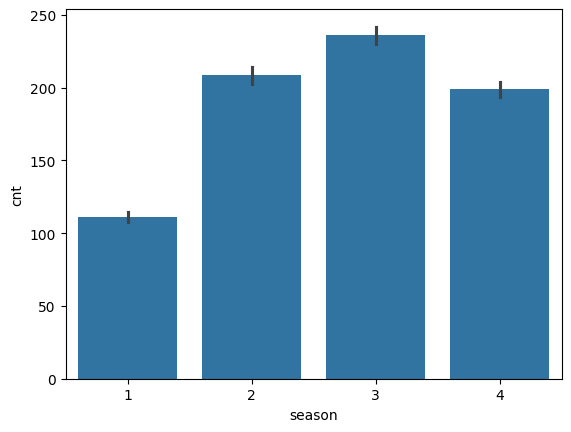

In [5]:
# Implement a bar plot of Season vs Count
sns.barplot(data=bike_share, x='season', y='cnt')

Winter has the least amount of bike rides, while Summer has the most, which makes intuitive sense.

<Axes: xlabel='workingday', ylabel='cnt'>

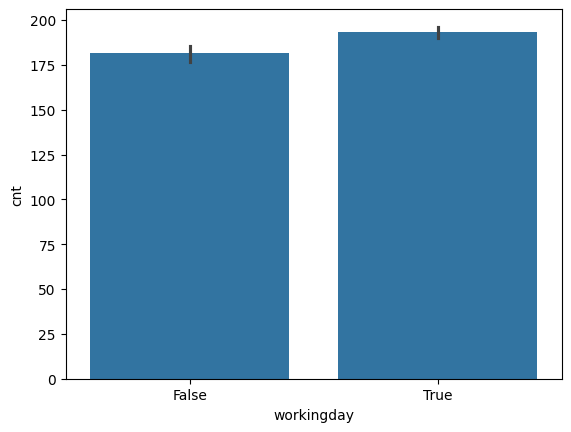

In [6]:
# Implement a bar chart for working day versus count.
sns.barplot(data=bike_share, x='workingday', y='cnt')

The bar plot shows that on average there are less bike rentals on weekends and holidays than during weekdays.

<Axes: xlabel='mnth', ylabel='cnt'>

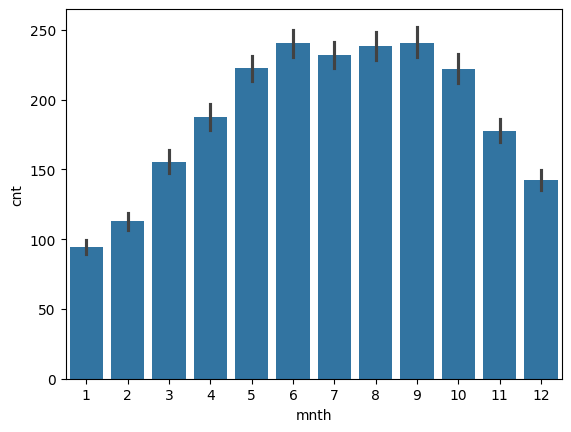

In [7]:
# Implement a bar chart for month versus count.
sns.barplot(data=bike_share, x='mnth', y='cnt')

The summer months see the most biek rentals, with the top months being June and September.

<Axes: xlabel='weathersit', ylabel='cnt'>

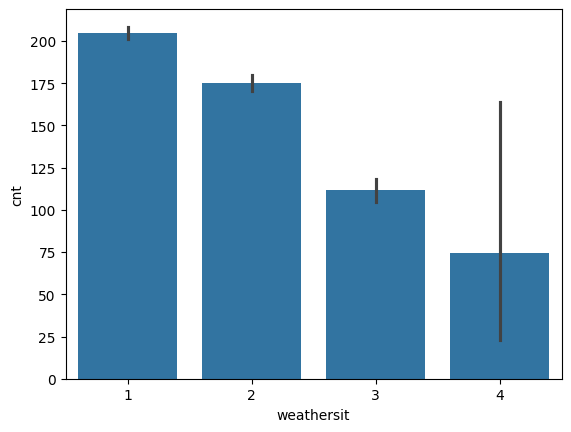

In [8]:
# Implement a bar plot of weathersit versus cnt.
sns.barplot(data=bike_share, x='weathersit', y='cnt')

Intuitively, there are far less bike rentals on average in extreme weather conditions such as a thunderstorm.  The large error bar suggests there are only a few data points for a `weathersit` of 4.

<Axes: xlabel='weathersit', ylabel='cnt'>

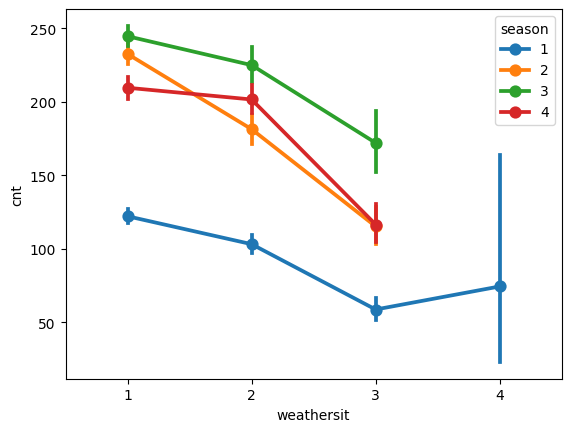

In [9]:
# Implement a point plot of weathersit on the x-axis, count on the y-axis, and the season as the hue. 
sns.pointplot(data=bike_share, x='weathersit', y='cnt', hue='season')

All four seasons have bike rentals for the first three weather conditions, and each season has a downward trend in bike rentals as the weather worsens.  Winter is the only season in which there were bike rentals during the worst weather conditions.  There is a shallow decrease in bike rentals in Fall when between when the weather is clear and when the weather is misty, but there is a sharp decrease from misty to precipitation.

<Axes: xlabel='hr', ylabel='cnt'>

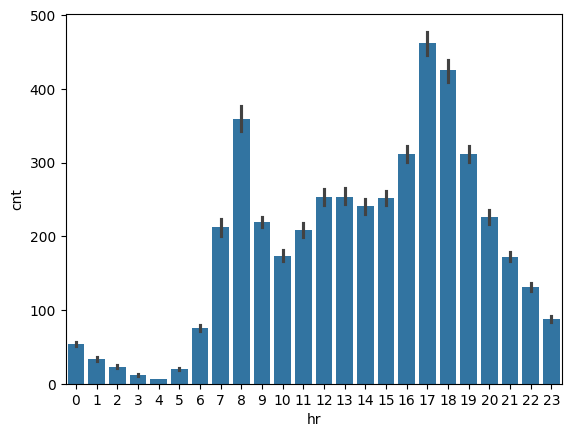

In [10]:
# Implement a bar plot of hour versus count. 
sns.barplot(data=bike_share, x='hr', y='cnt')

The evening hours, 5 and 6 PM, have the most bike rentals on average. There is a spike at 8AM as well.

<Axes: xlabel='hr', ylabel='cnt'>

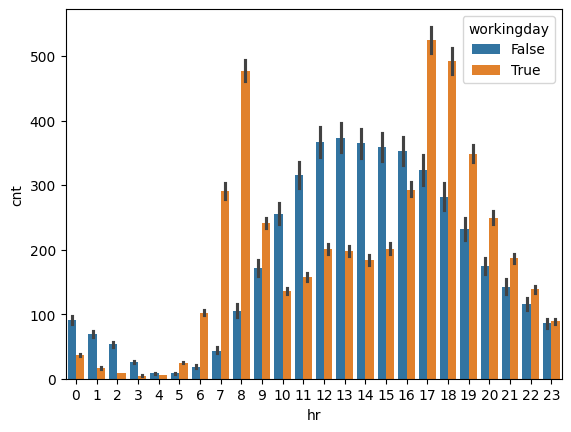

In [11]:
# Implement a bar plot of hour versus count on weekends and holidays (when workingday = 0)
sns.barplot(data=bike_share, x='hr', y='cnt', hue='workingday')

For weekdays, bike rentals occur most often in the evening at 5 PM and in the morning at 8 AM.  On weekends and holidays, bike rentals happend most often in the afternoon, betweem 12 and 2 PM.

## Part 2: Data Preperation
- Implement and graph a correlation matrix with the remaining numeric features. Any interesting relationships?
- Scale the numerical features using StandardScaler(), and replace the original columns in your dataframe.
- Drop the following columns from your dataset: casual, registered, dteday, instant.
- Implement a histogram of the count column. What can be said based on the resulting distribution?
- Implement a train/test split with a test size of 33%.
- Implement a baseline linear regression algorithm. Use cross-validation to output r2 and mse. Calculate RMSE base on mse.

In [12]:
# Implement and graph a correlation matrix with the numeric features
bike_share_nums.corr()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
temp,0.136178,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.278379,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


<Axes: >

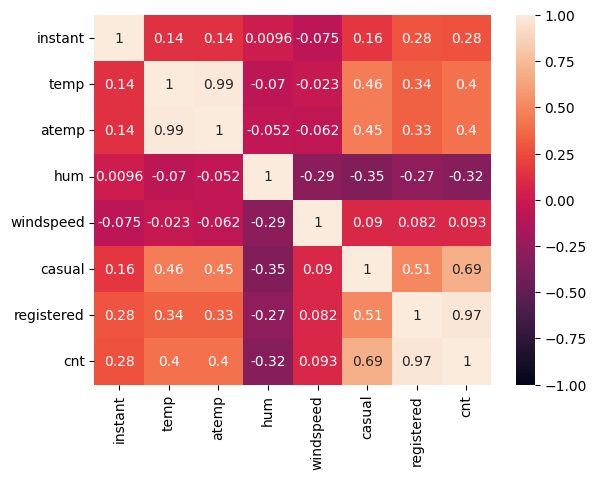

In [13]:
sns.heatmap(bike_share_nums.corr(), vmin=-1, vmax=1, annot=True)

All of the weather paramters - temperature, humidty, and windspeed - are negative correlated with each other.  The biggest positive correlation with bike rentals is temperature, so higher temperatures mean more bike rentals.  The biggest negative correlation is with humidty, meaning less bike rentals as humidity increases.

In [14]:
# Scale the numerical features using StandardScaler(), and replace the original columns in your dataframe.
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled_nums = pd.DataFrame(scaler.fit_transform(bike_share_nums))
# bike_share[bike_share_nums.columns] = scaled_nums

It doens't make sense to scale the numerical data as the temperature values are already normalized and the rental counts don't need to be scaled since they are the target values.  Above is the code that would replace the original data with scaled data if it were necessary.


In [15]:
# Drop the following columns from the dataset: casual, registered, dteday, instant
bike_share.drop(columns=['casual', 'registered', 'dteday', 'instant'], inplace=True)

<Axes: xlabel='cnt', ylabel='Count'>

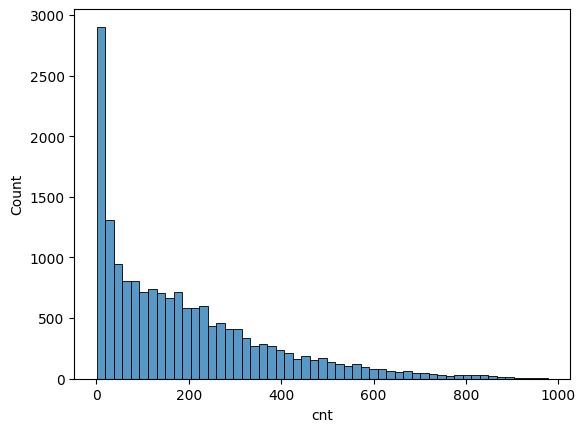

In [16]:
# Implement a histogram of the count column
sns.histplot(bike_share, x='cnt')

The distribution of count is very right skewed - most of the values are 0 or close to 0 and it tapers off from there.  The distribution resembles an exponential decay.

In [17]:
# Implement a train/test split with a test size of 33%
from sklearn.model_selection import train_test_split

target = bike_share['cnt']
bike_share.drop(columns='cnt', inplace=True)
X_train, X_test, y_train, y_test = train_test_split(bike_share, target, test_size=.33, random_state=0)

In [18]:
X_train

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
9271,1,1,1,5,False,5,True,2,0.42,0.4242,0.94,0.3284
6651,4,0,10,17,False,0,False,1,0.62,0.6061,0.61,0.1045
6496,4,0,10,6,False,1,True,2,0.36,0.3788,0.71,0.0000
12808,3,1,6,21,False,5,True,3,0.68,0.6364,0.65,0.2836
67,1,0,1,22,False,1,True,1,0.14,0.1515,0.69,0.1343
...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1,1,1,7,False,3,True,1,0.24,0.2273,0.75,0.2239
13123,3,1,7,0,False,5,True,1,0.78,0.7424,0.62,0.1343
9845,1,1,2,5,True,1,False,2,0.24,0.2121,0.60,0.3582
10799,2,1,3,2,False,6,False,2,0.42,0.4242,0.77,0.2537


In [19]:
# Implement a baseline linear regression algorithm. Use cross-validation to output r2 and mse. Calculate RMSE base on mse.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [20]:
rmse = np.sqrt(-cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error'))
r2 = cross_val_score(lin_reg, X_train, y_train, scoring='r2')

print("RMSE: ", rmse, "Average: ", rmse.mean())
print("R2 Score: ", r2, "Average: ", r2.mean())

RMSE:  [140.82986037 142.38827425 143.17525738 144.80160386 140.22767564] Average:  142.2845342997129
R2 Score:  [0.38715312 0.38729955 0.38336996 0.37076991 0.38790142] Average:  0.38329879251550747


### Part 3

Model Training

- Create one-hot-encoded values for your categorical columns using get_dummies and add them to your source dataset.
- Drop the original categorical columns from your source dataset.
- Do a test/train split based on your new source dataset. Implement and fit a new linear model on your new training set.
- What are the new values for r2, mse, and rmse?
- Implement and score a decision tree regressor with random_state=0.
- Implement and score a RandomForestRegressor with random_state=0 and n_esitmators=30.
- Implement and score an SGDRegressor with max_iter=1000 and tol=1e-3).
- Implement and score a Lasso Regressor with alpha=0.1.
- Implement and score an ElasticNet Regressor with random_state=0.
- Implement and score a Ridge Regressor with alpha=0.5.
- Implement and score a BaggingRegressor

In [21]:
# Defining a function to fit and score different models using cross validation
def fit_and_score_model(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error'))
    r2 = cross_val_score(model, X, y, scoring='r2')

    print("RMSE: ", rmse, "Average: ", rmse.mean())
    print("R2 Score: ", r2, "Average: ", r2.mean())

In [22]:
# Create one-hot-encoded values for your categorical columns using get_dummies and drop original categorical features
bike_share = pd.get_dummies(bike_share, columns=['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit'])

# Do a test/train split implement and fit a new linear model on your new training set.
X_train, X_test, y_train, y_test = train_test_split(bike_share, target, test_size=0.33, random_state=0)
lin_reg.fit(X_train, y_train)

# New values for RMSE and R2
fit_and_score_model(lin_reg, X_train, y_train)

RMSE:  [100.4005626  100.7682368  103.88662935 103.27219005  99.9121132 ] Average:  101.64794640098009
R2 Score:  [0.68851669 0.69313521 0.6753555  0.67994139 0.68926499] Average:  0.6852427570297925


The RMSE and R2 Score of the encoded model is much improved over the previous one.  The average RMSE decreased from 142 to 102, and the R2 score increased from 0.38 to 0.68.

In [23]:
# Implement and score a decision tree regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=0)
fit_and_score_model(tree_reg, X_train, y_train)

RMSE:  [75.41913512 78.72722227 77.06256554 76.15074239 76.30833355] Average:  76.73359977589617
R2 Score:  [0.82423776 0.8126949  0.82136125 0.82597525 0.81874173] Average:  0.8206021781040398


The decision tree performs better than the linear regressor with a lower RMSE and higher R2 score.

In [24]:
# Implement a random forest regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=0, n_estimators=30)
fit_and_score_model(forest_reg, X_train, y_train)

RMSE:  [53.97684469 53.80275023 53.91431342 57.99527102 54.7763343 ] Average:  54.89310273021815
R2 Score:  [0.90997203 0.91252002 0.91256267 0.89906358 0.90660152] Average:  0.9081439612532506


The random forest regressor is even better than the decision tree, further improving on the RMSE and R2 score.

In [25]:
# Implement an SGD Regressor
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=0.001, random_state=0)
fit_and_score_model(sgd_reg, X_train, y_train)

RMSE:  [100.36688013 100.51323192 104.04087322 103.30206121  99.96504954] Average:  101.63761920329831
R2 Score:  [0.68872565 0.69468635 0.67439077 0.67975622 0.68893563] Average:  0.6852989224394916


The SGD Regressor performs on par with the linear regressor.

In [26]:
# Implement and score a Lasso Regressor
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1, random_state=0)
fit_and_score_model(lasso_reg, X_train, y_train)

RMSE:  [100.51710416 100.50391653 104.09423048 103.29184527  99.92708799] Average:  101.66683688565244
R2 Score:  [0.68779316 0.69474294 0.6740567  0.67981955 0.68917184] Average:  0.6851168374265022


The lasso regressor also performs on par with the linear regressor

In [27]:
# Implement and score an Elastic Net regressor
from sklearn.linear_model import ElasticNet

enet_reg = ElasticNet(random_state=0)
fit_and_score_model(enet_reg, X_train, y_train)

RMSE:  [161.02850444 163.44060907 164.09799974 164.27572276 160.94233411] Average:  162.75703402465768
R2 Score:  [0.19875007 0.19272838 0.1899808  0.19014082 0.19370403] Average:  0.19306082006059583


The Elastic Net model has performed the worst so far.

In [28]:
# Implement and score a Ridge Regressor
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.5, random_state=0)
fit_and_score_model(ridge_reg, X_train, y_train)

RMSE:  [100.47781157 100.5129763  103.88586304 103.27432195  99.92172439] Average:  101.61453944969965
R2 Score:  [0.68803719 0.6946879  0.67536029 0.67992818 0.6892052 ] Average:  0.685443754194723


The Ridge regressor performs on par with the linear, lasso, and SGD regressors.

In [29]:
# Implement and score a Bagging Regressor
from sklearn.ensemble import BaggingRegressor

bag_reg = BaggingRegressor(random_state=0)
fit_and_score_model(bag_reg, X_train, y_train)

RMSE:  [55.80137833 57.32415954 56.39846754 59.88961502 57.87666711] Average:  57.458057507339184
R2 Score:  [0.90378288 0.90069408 0.90431952 0.89236196 0.89572963] Average:  0.8993776145016946


The Bagging Regressor is the second best performing model, next to the Random Forest Regressor.

### Part 4. Model Tuning

- Take the top three performing models and implement cross-validation on them.
- Take your top performing model and do a randomize search cv with 20 iterations and three folds with the following parameters.
    - Bootstrap: true, false
    - Max_depth: 10-110, number of bins 11
    - Max_features: auto, sqrt
    - Min_samples_split: 2,5,10
    - Min_samples_leaf: 1,2,4
    - N_estimators: 200 – 2000, number of bins 10
- Take your best_estimator_ and see how it compares by doing cross_vals for r2, mse, and calculating rmse.
- Finally, run predictions on your test set with this model, and see how your r2 score and RMSE look.

In [30]:
# Cross validation was already performed on each of the models above.  Repeating it here with cross_validate for the top 3 models
from sklearn.model_selection import cross_validate
cross_validate(tree_reg, X_train, y_train)

{'fit_time': array([0.10291219, 0.09460402, 0.09462595, 0.09724092, 0.09591007]),
 'score_time': array([0.00397992, 0.00261188, 0.00301886, 0.00328302, 0.00328898]),
 'test_score': array([0.82423776, 0.8126949 , 0.82136125, 0.82597525, 0.81874173])}

In [31]:
cross_validate(forest_reg, X_train, y_train)

{'fit_time': array([1.90416884, 1.843678  , 1.86017799, 1.82170606, 1.81914878]),
 'score_time': array([0.02412605, 0.0188899 , 0.02078724, 0.02099395, 0.0206871 ]),
 'test_score': array([0.90997203, 0.91252002, 0.91256267, 0.89906358, 0.90660152])}

In [32]:
cross_validate(bag_reg, X_train, y_train)

{'fit_time': array([0.64153481, 0.6474328 , 0.60970807, 0.61096978, 0.65311193]),
 'score_time': array([0.01314425, 0.01414013, 0.01125598, 0.01272511, 0.0168581 ]),
 'test_score': array([0.90378288, 0.90069408, 0.90431952, 0.89236196, 0.89572963])}

In [34]:
# Randomized search CV with the top model
from sklearn.model_selection import RandomizedSearchCV

params = {
    'bootstrap': [True, False],
    'max_depth': np.linspace(10, 110, 11, dtype='int'),
    'max_features': ['sqrt', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': np.linspace(200, 2000, 10, dtype='int'),
}

rand_search = RandomizedSearchCV(forest_reg, params, n_iter=20, cv=3, n_jobs=4)
rand_search.fit(X_train, y_train)
rand_search.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 40,
 'bootstrap': True}

In [36]:
best_model = rand_search.best_estimator_

fit_and_score_model(best_model, X_train, y_train)

RMSE:  [52.76520671 52.53198555 53.05298485 55.91172984 53.38677528] Average:  53.5297364452277
R2 Score:  [0.91396845 0.91660359 0.91533413 0.9061858  0.91128005] Average:  0.9126744018256266


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

y_predict = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
r2 = r2_score(y_test, y_predict)

print("RMSE: ", rmse)
print("R2 Score: ", r2)

RMSE:  52.03833854260479
R2 Score:  0.9180180243364973


The hypertuned model performed just slightly better than the original Random Forest Regressor in Part 3.  The model does seem to generalize well, as the RMSE and R2 score on the test data was the same as the training scores.